# **House Prices**


*기울어진 글씨*  
_기울어진 글씨_  
**굵은 글씨**  
__굵은 글씨__  
~~줄그어진 글씨~~  

In [3]:
!move "C:\Users\jju53\OneDrive\바탕 화면\train.csv" .
!move "C:\Users\jju53\OneDrive\바탕 화면\test.csv" .

        1개 파일을 이동했습니다.
        1개 파일을 이동했습니다.


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency # 카이제곱 분석
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 데이터 파악

In [47]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [48]:
train_df = pd.DataFrame(train)

test_df = pd.DataFrame(test)


In [49]:
train_df['index'] = 0
test_df['index'] = 1


all_df = train_df.append(test_df)
all_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,index
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,0


## SalePrice(Y)값 확인 및 로그변환

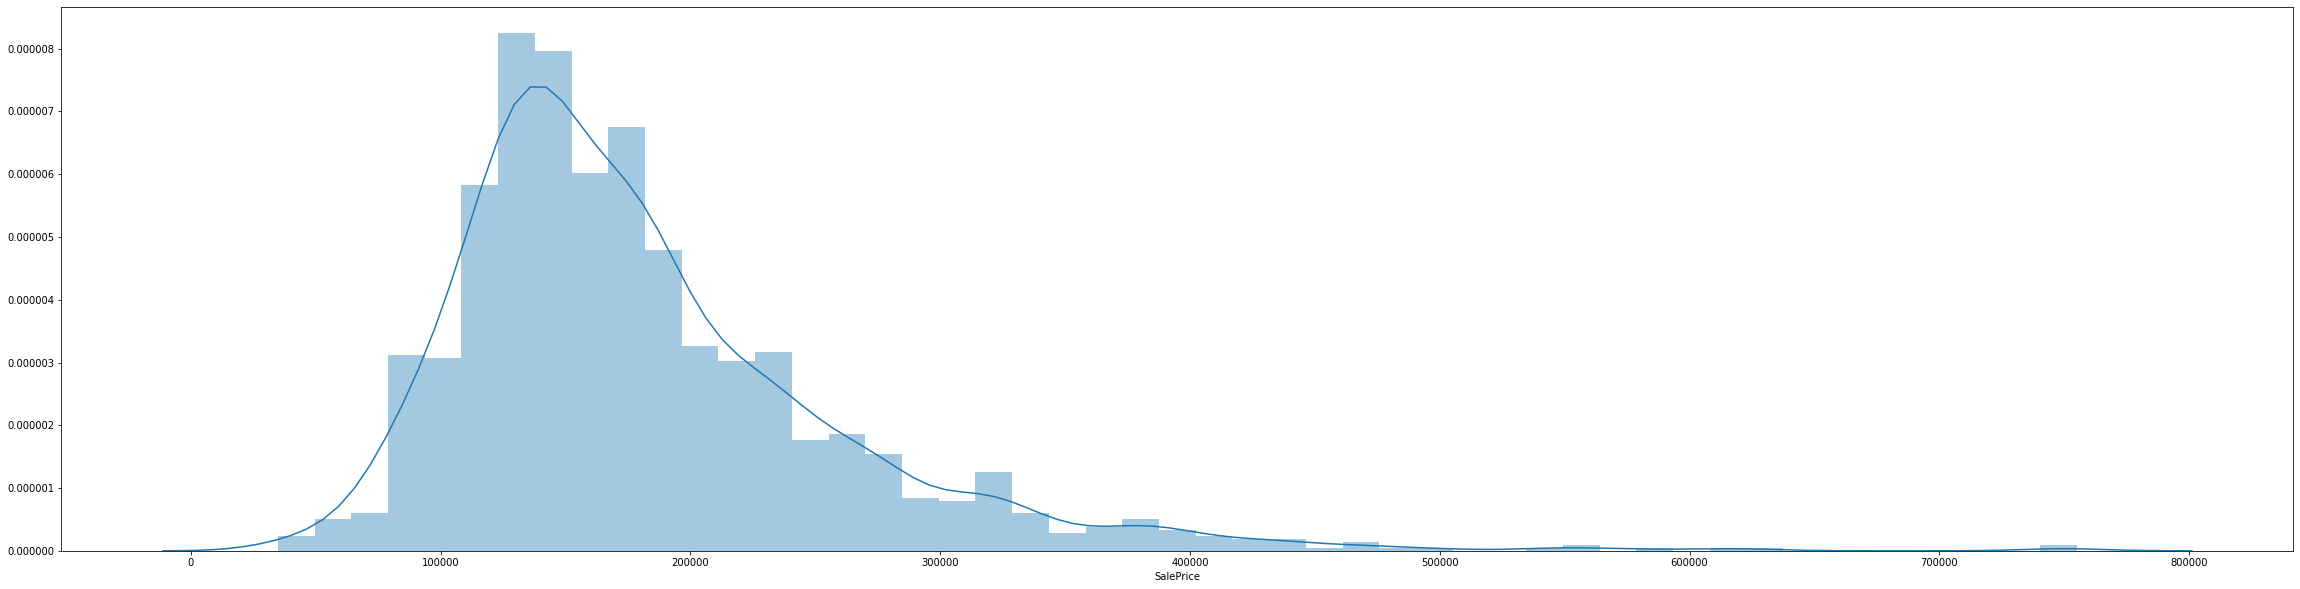

In [50]:
sns.distplot(train_df['SalePrice'])

__정규화 시켜주기 위해 로그 변환 진행__

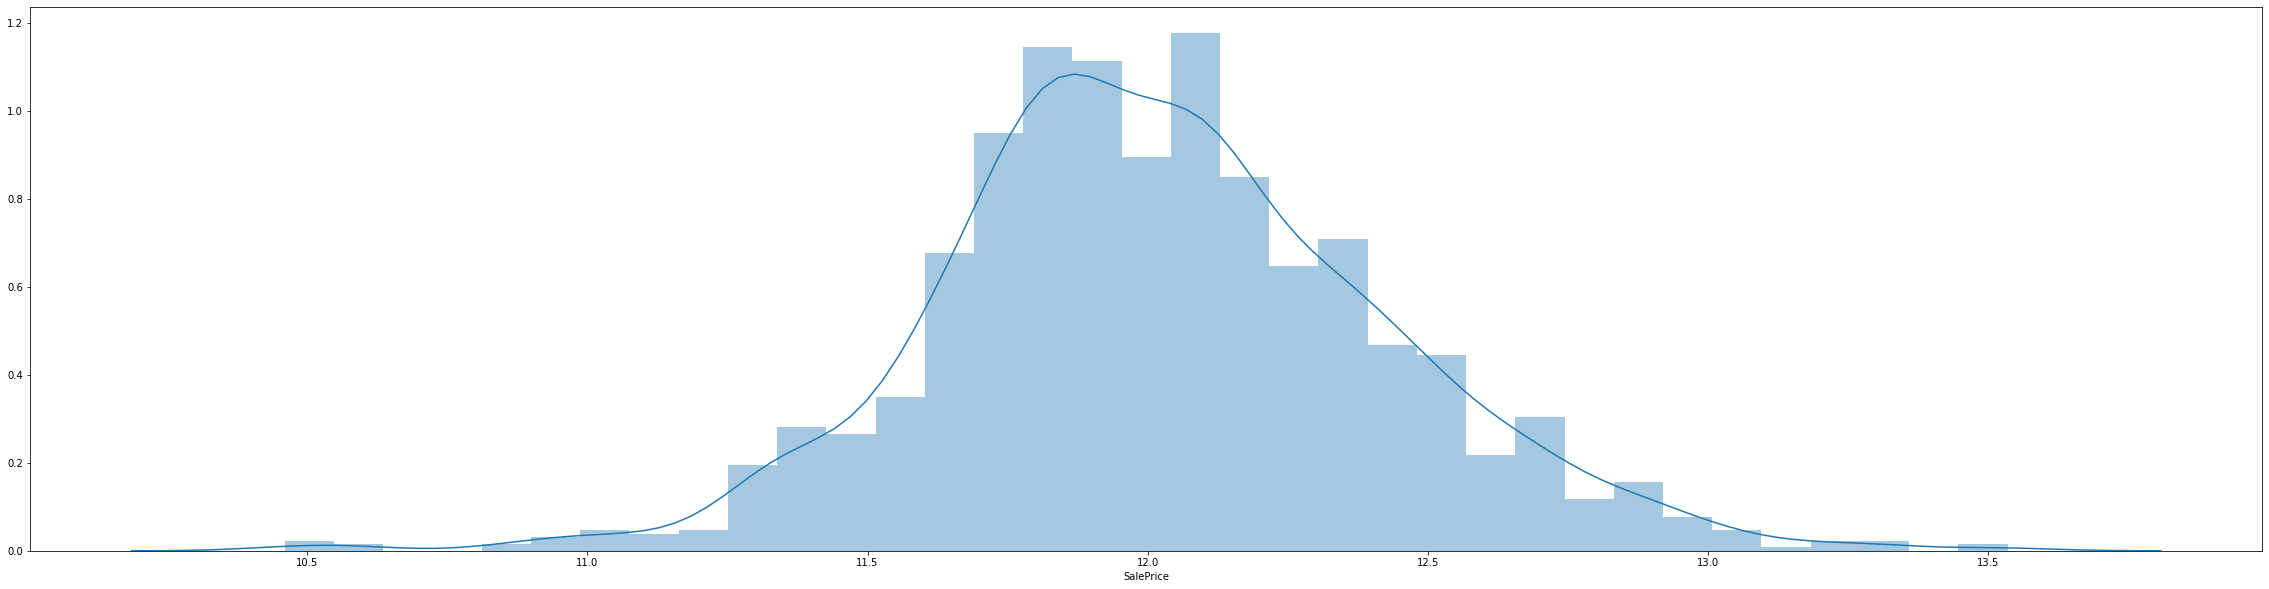

In [51]:
sns.distplot(np.log1p(train_df['SalePrice']))

In [52]:
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])
all_df['SalePrice'] = np.log1p(all_df['SalePrice'])

# 범주형 /  수치형 변수 분석

In [53]:
all_df=all_df.astype({'YearBuilt' : object, 'GarageYrBlt' : object,
               'YearRemodAdd' : object, 'MSSubClass' : object})

all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   object 
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [54]:
cat_index=list(all_df.dtypes[all_df.dtypes == 'object'].index)
numeric_index = list(all_df.dtypes[all_df.dtypes != 'object'].index) # 36
numeric_index.remove('Id')
numeric_index.remove('index')
numeric_index

# drop('Id','SalePrice','index')

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

## 수치형 -  상관계수

In [55]:
# 상관계수의 절대값이 0.4이상인 수치만 사용
corr = pd.DataFrame(train_df[numeric_index].corr(method='pearson').sort_values('SalePrice', ascending=False)['SalePrice']).drop(['SalePrice'],axis=0)
corr_4=corr[abs(corr['SalePrice'])>0.4].index
corr_4
numeric_index.remove('SalePrice')

for a in numeric_index:
    if a not in corr_4:
        all_df=all_df.drop(a, axis=1)


Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'MasVnrArea'],
      dtype='object')

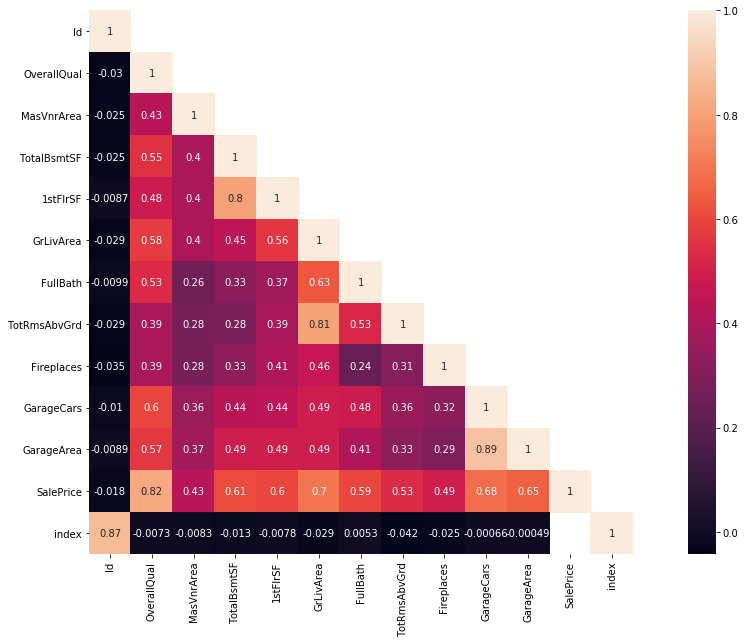

In [56]:
corrMat = all_df.corr()
mask = np.array(corrMat)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corrMat, mask=mask, vmax=1., square=True, annot=True)
# square = 정사각형, annot = 상관계수 표시 여부

## 범주형

* 모든 범주형 데이터에서 SalePrice의 자료 형태를 한번에 확인하기 위함

range(0, 47)

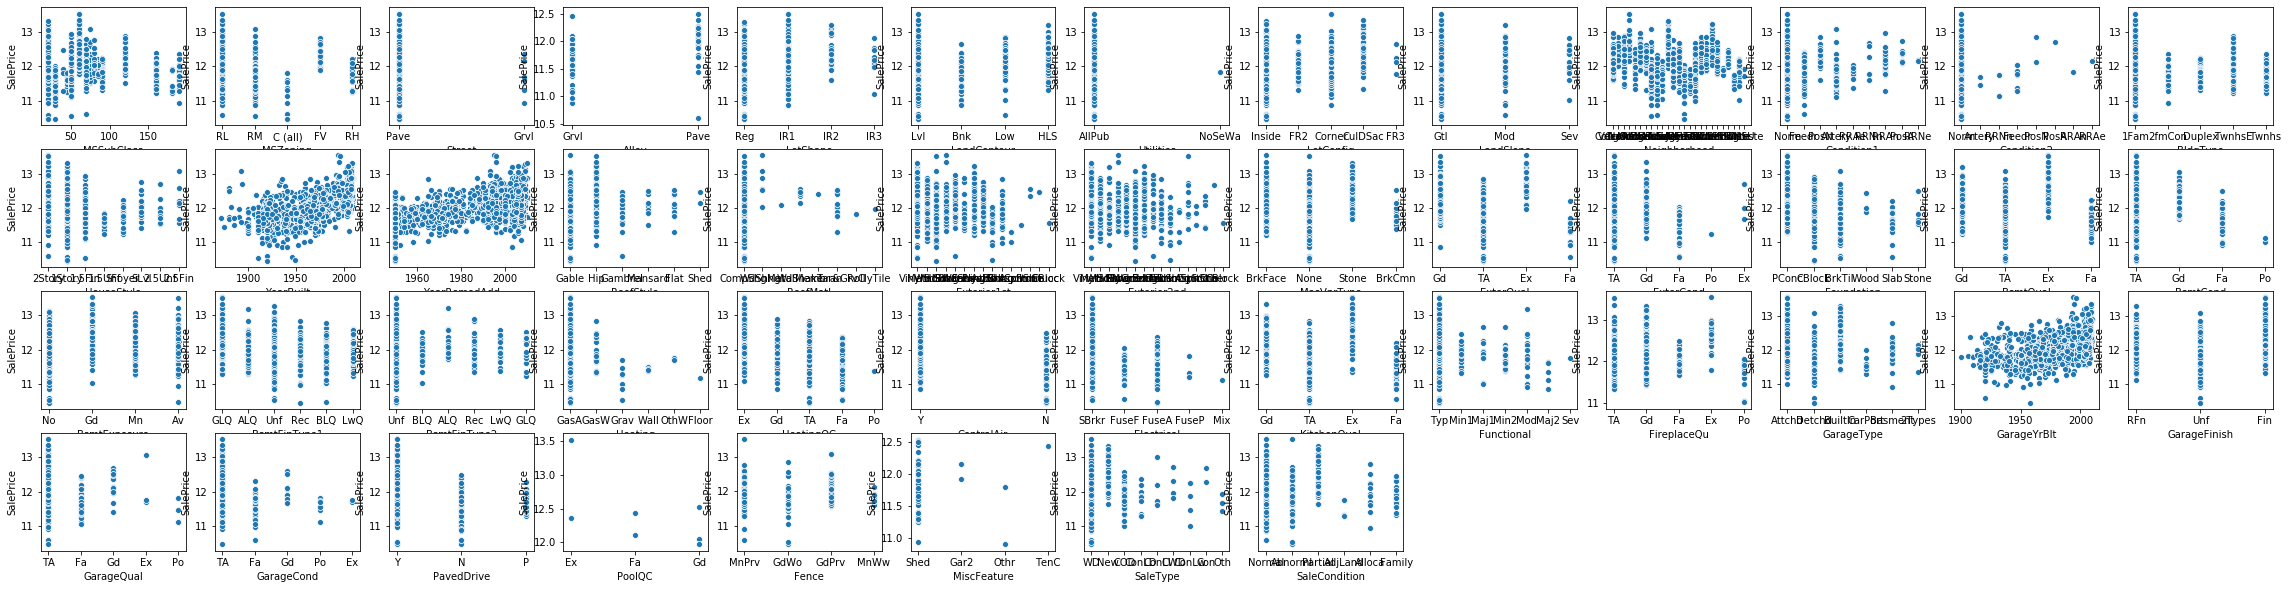

In [57]:
range(len(cat_index))

# plt.subplot(열갯수, 행갯수, 가로왼쪽에서 몇번째)

# 범주형 변수와 Y(SalePrice)값 사이의 scatterplot 그리기
plt.rcParams["figure.figsize"] = (40,10)

for a,b in enumerate(cat_index):
    plt.subplot(4,13,a+1);
    sns.scatterplot(b, 'SalePrice', data=train_df);




__* 선형관계를 나타낸 변수 : Neighborhood, YearBuilt, YearRemodAdd, GarageYrBlt__

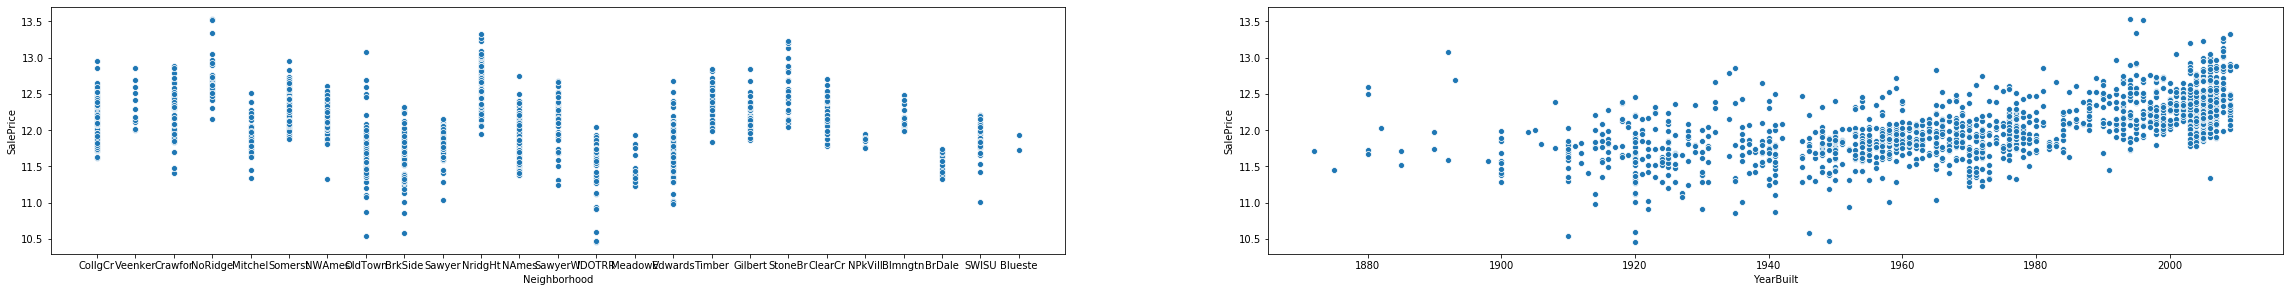

In [58]:
plt.subplot(221)
sns.scatterplot('Neighborhood', 'SalePrice', data=train_df);

plt.subplot(222)
sns.scatterplot('YearBuilt', 'SalePrice', data=train_df);

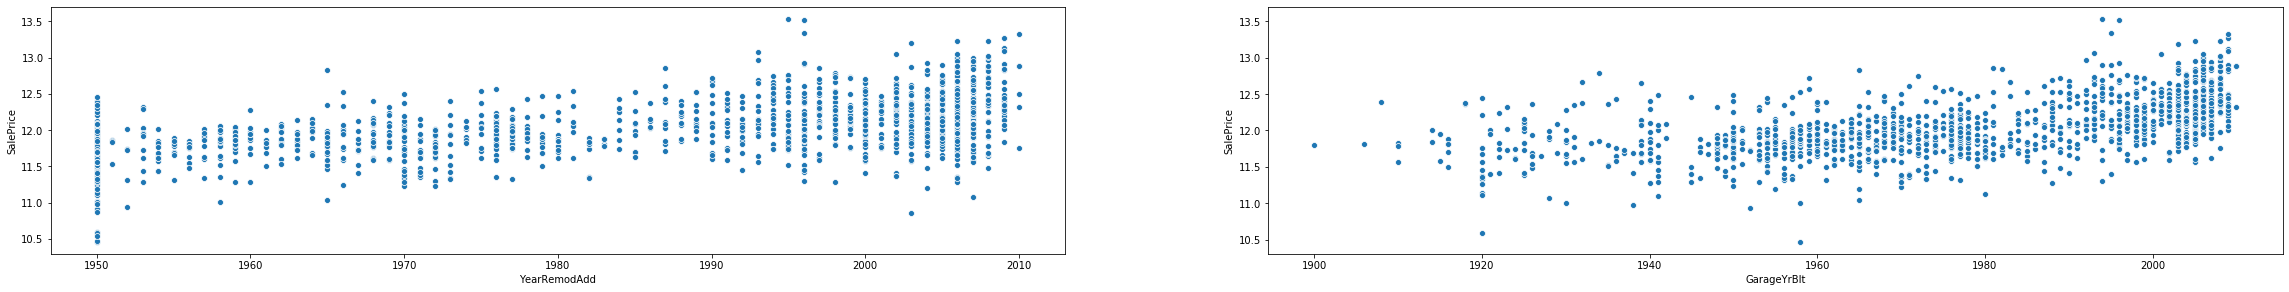

In [59]:
plt.subplot(221)
sns.scatterplot('YearRemodAdd', 'SalePrice', data=train_df);
plt.subplot(222)
sns.scatterplot('GarageYrBlt', 'SalePrice', data=train_df);


## Data Missing
* 50%이상인 값은 제외

In [60]:
# 전체 row의 수 : 2919 / 2 = 약 1455(50%)

# 결측값을 가진 변수 확인
missing = pd.DataFrame(all_df.isnull().sum(), columns=['isnull']).drop(['SalePrice'], axis=0)
missing = missing[missing['isnull'] != 0]['isnull'].sort_values(ascending=False)
missing

# 약 50% 이상의 결측치는 제거
all_df = all_df.drop(['MiscFeature','Alley','Fence','FireplaceQu'], axis=1)


PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
GarageCond       159
GarageQual       159
GarageFinish     159
GarageYrBlt      159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
Utilities          2
Exterior2nd        1
Exterior1st        1
SaleType           1
TotalBsmtSF        1
KitchenQual        1
GarageCars         1
GarageArea         1
Electrical         1
Name: isnull, dtype: int64

In [61]:

# [Garage] 같은 관측값에 대해서 발생한 missing값
# GarageCars가 차고에 대해 설명을 잘 해줌
# GarageYrBlt가 선형관계를 이루고 있음을 확인했으므로 남겨둔 후 대체
# 위의 2가지 변수 이외에 Garage와 관련된 값은 삭제
all_df = all_df.drop(['GarageCond','GarageQual','GarageFinish','GarageType','GarageType','GarageArea'], axis=1)


# [Bsmt] 같은 관측값에 대해서 발생한 missing값
# 이 중 대표적인 값이 될 수 있는 'BsmtQual'을 제외하고 모두 삭제
all_df = all_df.drop(['BsmtCond','BsmtExposure','BsmtFinType2','BsmtFinType1'], axis=1)


# [MasVnr] 같은 관측값에 대해서 발생한 missing값
# 이 중 대표적인 값이 될 수 있는 'MasVnrType'을 제외하고 모두 삭제
all_df = all_df.drop(['MasVnrArea'], axis=1)


In [62]:
# 2207 값은 오류인 것으로 판단하여 '2007'년으로 수정(최대값 2010년)
all_df['GarageYrBlt'].value_counts()
all_df.loc[all_df['GarageYrBlt'] == '2207', 'GarageYrBlt'] = '2007'




2005.0    142
2007.0    115
2006.0    115
2004.0     99
2003.0     92
         ... 
1908.0      1
1906.0      1
1896.0      1
1895.0      1
2207.0      1
Name: GarageYrBlt, Length: 103, dtype: int64

In [71]:
# 남은 변수 확인
missing = pd.DataFrame(all_df.isnull().sum(), columns=['isnull']).drop(['SalePrice'], axis=0)
missing = missing[missing['isnull'] != 0].index
missing

# 변수형태에 따라 missing 데이터 대체
# 범주형 -> 최빈값
# 수치형 -> 평균
for i in missing:
    if all_df[i].dtypes == object:
        all_df.loc[all_df[i].isnull() == True, i] = all_df[i].value_counts().index[0]
    if all_df[i].dtypes != object:
        all_df.loc[all_df[i].isnull() == True, i] = round(all_df[i].mean())

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'BsmtQual', 'TotalBsmtSF', 'Electrical', 'KitchenQual', 'Functional',
       'GarageYrBlt', 'GarageCars', 'PoolQC', 'SaleType'],
      dtype='object')

# Data modeling

In [93]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline


In [73]:
all = pd.get_dummies(all_df.drop(['Id'], axis=1))

In [74]:
# train 데이터 x,y로 나누어 저장
train_x = all[all['index']==0].drop(['SalePrice','index'], axis=1).values
train_y = all[all['index']==0]['SalePrice'].values

# fit 해야할 데이터 test의 x값 저장
test_x = all[all['index']==1].drop(['SalePrice','index'], axis=1)b

In [94]:
train_y

array([12.24769912, 12.10901644, 12.31717117, ..., 12.49313327,
       11.86446927, 11.90159023])

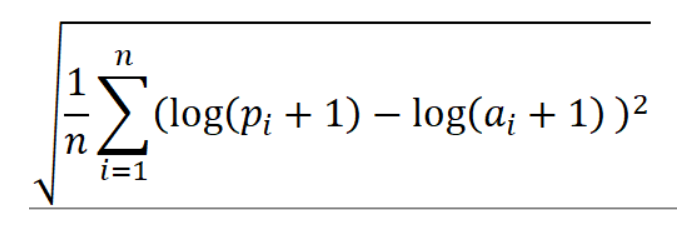

In [112]:
from sklearn.metrics import make_scorer

def rmsle(predict, actual):
    # 넘파이로 배열 형태로 바꿔줌
    predict= np.array(predict)
    actual = np.array(actual)

    # 예측, 실제 값에 1을 더하고 로그 취해준 후, 제곱변환
    difference = np.square(np.log(predict + 1) - np.log(actual + 1))
    
    # 평균 후 루트 씌워줌
    score = np.sqrt(difference.mean())

    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

## Linear Regression

In [76]:
LR = LinearRegression()

In [101]:
# Train the model
LR.fit(train_x, train_y)
LR_train_pred = LR.predict(train_x)
LR_pred = np.expm1(LR.predict(test_x.values))
print ("RMSLE Value For Linear Regression: ")
print(rmsle(train_y, LR_train_pred))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

RMSLE Value For Linear Regression: 
0.00731421775356822


C:\Users\jju53\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in expm1
  after removing the cwd from sys.path.


## Lasso Regression

In [102]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=3))

In [103]:
lasso.fit(train_x,train_y)
lasso_train_pred = lasso.predict(train_x)
lasso_pred = np.expm1(lasso.predict(test_x.values))
print ("RMSLE Value For Lasso Regression: ")
print(rmsle(train_y, lasso_train_pred))

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('lasso',
                 Lasso(alpha=0.0005, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=3, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

RMSLE Value For Lasso Regression: 
0.009277811527838123


## RandomForestRegressor

In [104]:
RFregressor = RandomForestRegressor()

In [105]:
RFregressor.fit(train_x,train_y)
RFregressor_train_pred = RFregressor.predict(train_x)
RFregressor_pred = np.expm1(RFregressor.predict(test_x.values))
print ("RMSLE Value For Lasso Regression: ")
print(rmsle(train_y, RFregressor_train_pred))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

RMSLE Value For Lasso Regression: 
0.004456914190671456


# Predict
 * 3가지 중 RMSLE 값이 가장 작은 RandomForestRegressor로 예측 제출

In [106]:
# Random Forest Regressor
submission=pd.DataFrame({"Id":test_df['Id'].tolist(),"SalePrice":RFregressor_pred})
submission.to_csv('HousePrice_submission_200721_2_RandomForestRegressor.csv', index=False)

submission.head()

,Id,SalePrice
0,1461,122008.124258
1,1462,151309.549603
2,1463,174739.280944
3,1464,187096.178793
4,1465,200701.670992
